# PHP - Pulsating Heat Pipe [Al2O3, 60FR]
Data collection and preparation for data analysis and machine learning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
import glob
from mdf import mdf

# Using MDF functions

Loading mdf class

In [2]:
mdf('data/al2o3_diwater_exp/60_FR/')

Loading data from: data/al2o3_diwater_exp/60_FR/


loading data and converting to MKS system

In [3]:
# loading and preparing data
df, df_conv = mdf.DataETL('data/al2o3_diwater_exp/60_FR/')

Compiled and converted data is saved at: data/al2o3_diwater_exp/60_FR/'combined_converted_data.csv'


In [4]:
df_conv

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W]
0,0.0,302.150000,301.90,0.250000,0.379969,0.003125
1,0.5,302.950000,301.90,0.916667,0.379969,0.011458
2,1.0,304.150000,302.15,1.666667,0.379969,0.020833
3,1.5,305.750000,302.15,3.000000,0.379969,0.037500
4,2.0,307.150000,303.15,3.000000,0.379969,0.037500
...,...,...,...,...,...,...
442,48.0,367.150000,352.65,14.500000,1.152651,0.181250
443,48.5,367.816667,352.40,15.416667,1.153985,0.192708
444,49.0,367.816667,352.15,15.666667,1.155318,0.195833
445,49.5,367.816667,352.15,15.666667,1.156651,0.195833


GFE calculation and DF preparation

In [5]:
# GFE calculation
df_gfe = mdf.GibbsFE(df_conv, "data/al2o3_diwater_exp/60_FR/")

Gibbs Free Energy calculated data saved at: data/al2o3_diwater_exp/60_FR/'gfe_combined.csv


In [6]:
df_gfe

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,0.0,302.150000,301.90,0.250000,0.379969,0.003125,-2430.851396,-2428.840101,-2.011295
1,0.5,302.950000,301.90,0.916667,0.379969,0.011458,-2437.287541,-2428.840101,-8.447440
2,1.0,304.150000,302.15,1.666667,0.379969,0.020833,-2446.941758,-2430.851396,-16.090362
3,1.5,305.750000,302.15,3.000000,0.379969,0.037500,-2459.814047,-2430.851396,-28.962651
4,2.0,307.150000,303.15,3.000000,0.379969,0.037500,-2471.077300,-2438.896577,-32.180723
...,...,...,...,...,...,...,...,...,...
442,48.0,367.150000,352.65,14.500000,1.152651,0.181250,433.650799,416.524457,17.126342
443,48.5,367.816667,352.40,15.416667,1.153985,0.192708,437.973264,419.616054,18.357210
444,49.0,367.816667,352.15,15.666667,1.155318,0.195833,441.504230,422.698939,18.805291
445,49.5,367.816667,352.15,15.666667,1.156651,0.195833,445.031123,426.075608,18.955515


# General Raw Data Visualisation

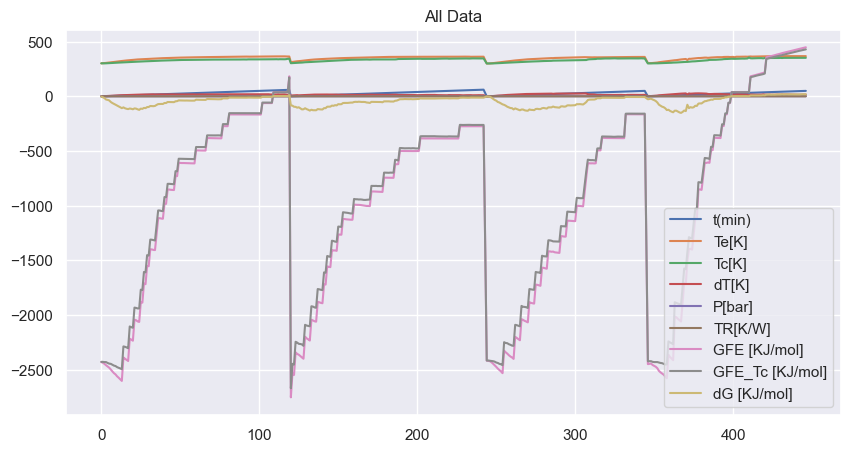

In [7]:
# plotting all data
mdf.PlotAllData(df_gfe)

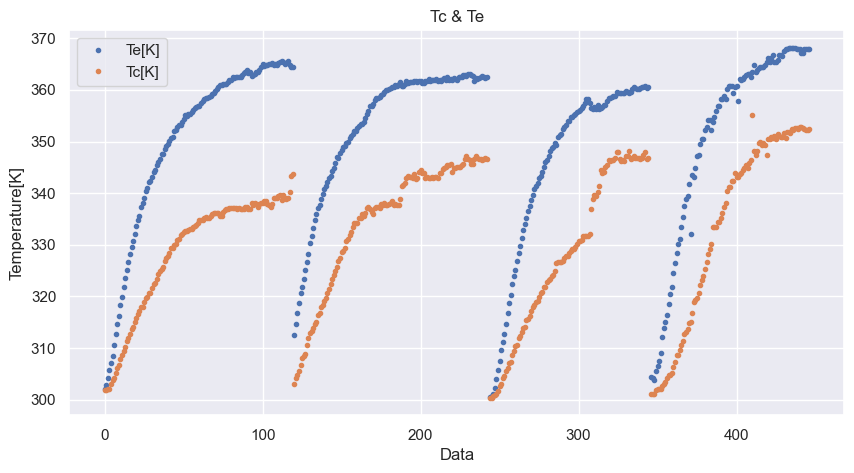

In [8]:
# plotting raw converted data of Tc and Te
mdf.PlotTempData(df_gfe)

# Data Analysis

Data selection (chopping) as per Te temperature

In [9]:
df_selected = mdf.DataChop(df_gfe,300,400)

Optimal range of temperature(Te) for data selection: [Tmin:300.55, Tmax:368]


In [10]:
df_selected

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,0.0,302.150000,301.90,0.250000,0.379969,0.003125,-2430.851396,-2428.840101,-2.011295
1,0.5,302.950000,301.90,0.916667,0.379969,0.011458,-2437.287541,-2428.840101,-8.447440
2,1.0,304.150000,302.15,1.666667,0.379969,0.020833,-2446.941758,-2430.851396,-16.090362
3,1.5,305.750000,302.15,3.000000,0.379969,0.037500,-2459.814047,-2430.851396,-28.962651
4,2.0,307.150000,303.15,3.000000,0.379969,0.037500,-2471.077300,-2438.896577,-32.180723
...,...,...,...,...,...,...,...,...,...
442,48.0,367.150000,352.65,14.500000,1.152651,0.181250,433.650799,416.524457,17.126342
443,48.5,367.816667,352.40,15.416667,1.153985,0.192708,437.973264,419.616054,18.357210
444,49.0,367.816667,352.15,15.666667,1.155318,0.195833,441.504230,422.698939,18.805291
445,49.5,367.816667,352.15,15.666667,1.156651,0.195833,445.031123,426.075608,18.955515


Data re-arrange, grouping and caculation for mean & std

In [11]:
df_mean, df_std = mdf.DataArrange(df_selected, 'data/al2o3_diwater_exp/60_FR/')

Calculated mean and standard deviation values saved at data/al2o3_diwater_exp/60_FR/'combined_mean.csv' and 'combined_std.csv'


In [12]:
df_mean

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,300.550000,0.000000,300.400000,0.150000,0.379969,0.001875,-2417.979106,-2416.772329,-1.206777
1,300.750000,0.500000,300.400000,0.350000,0.379969,0.004375,-2419.588143,-2416.772329,-2.815813
2,301.150000,1.000000,300.650000,0.500000,0.379969,0.006250,-2422.806215,-2418.783625,-4.022590
3,302.150000,0.000000,301.900000,0.250000,0.379969,0.003125,-2430.851396,-2428.840101,-2.011295
4,302.350000,1.500000,300.900000,1.450000,0.379969,0.018125,-2432.460432,-2420.794920,-11.665512
...,...,...,...,...,...,...,...,...,...
218,366.816667,40.000000,350.900000,15.916667,1.131320,0.198958,376.278813,359.954841,16.323972
219,367.150000,47.750000,352.775000,14.375000,1.151985,0.179688,431.884437,414.974292,16.910145
220,367.483333,42.000000,351.650000,15.833333,1.136653,0.197917,391.340825,374.479571,16.861254
221,367.816667,46.888889,352.177778,15.638889,1.149689,0.195486,426.513960,408.397183,18.116778


In [13]:
df_std

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
8,304.150000,0.353553,0.707107,0.942809,0.000000,0.011785,0.000000,5.688802,5.688802
11,305.750000,0.707107,0.353553,0.777817,0.000000,0.009723,0.000000,2.844401,2.844401
23,312.750000,0.707107,0.353553,1.720627,0.000000,0.021508,0.000000,2.844401,2.844401
25,314.750000,2.362908,1.040833,1.392972,0.000000,0.017412,0.000000,8.373690,8.373690
29,316.750000,3.181981,0.883883,0.954594,0.023568,0.011932,156.574290,144.223548,12.350742
...,...,...,...,...,...,...,...,...,...
216,366.150000,0.707107,0.353553,0.353553,0.036559,0.004419,101.180865,97.177348,4.003517
218,366.816667,1.322876,0.250000,0.250000,0.003527,0.003125,9.516032,9.294876,0.279144
219,367.150000,0.353553,0.176777,0.176777,0.000943,0.002210,2.498013,2.192263,0.305750
221,367.816667,2.713137,0.642802,0.642802,0.007234,0.008035,19.274499,18.879518,0.699059


Calculating of average value of all thermal properties

# Data Visualisation after Data Analysis

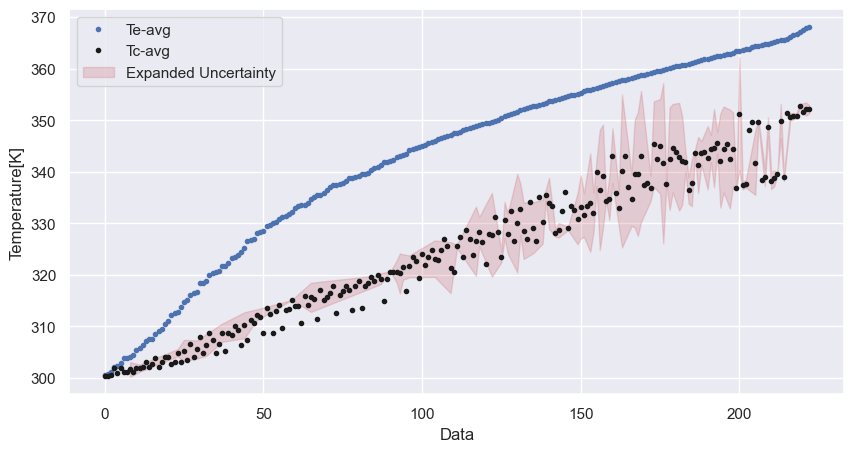

In [14]:
# plotting EU for Tc and Te
mdf.PlotEUTemp(df_mean, df_std)

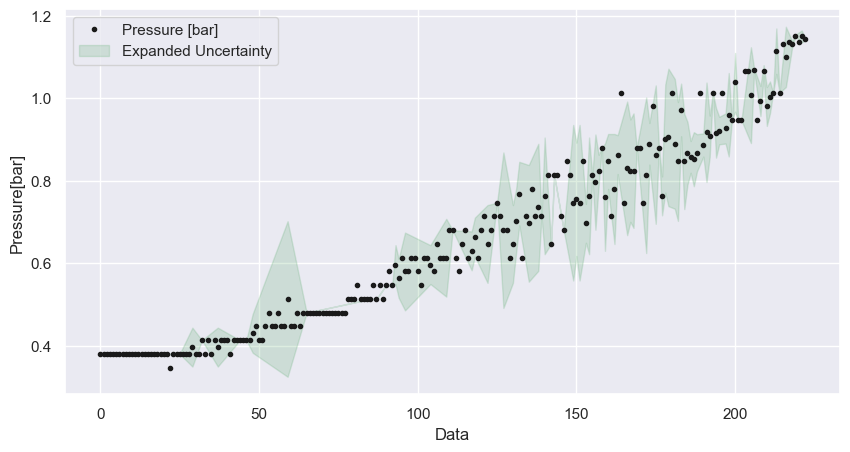

In [15]:
# plotting pressure
mdf.PlotEUPres(df_mean, df_std)

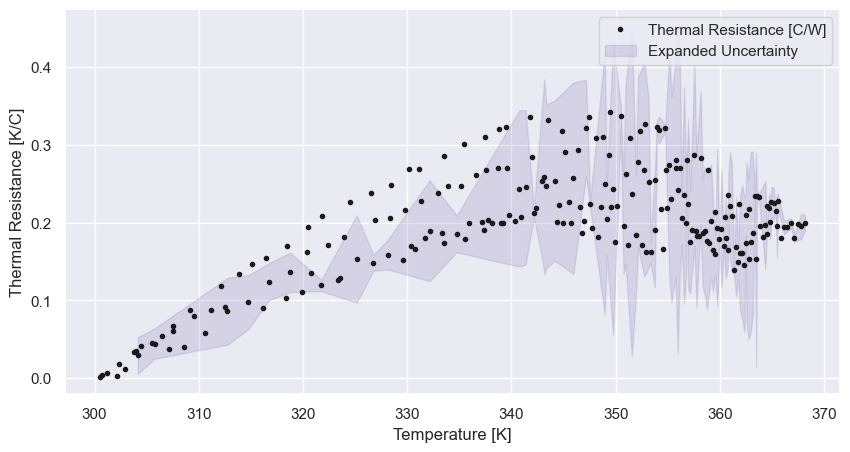

In [16]:
# plotting TR
mdf.PlotEUTR(df_mean,df_std)

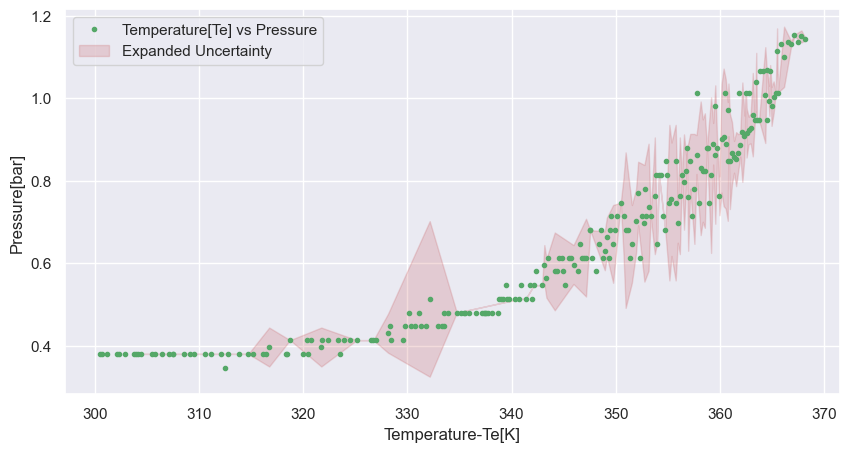

In [17]:
# plotting TP graph
mdf.PlotEUTP(df_mean,df_std)

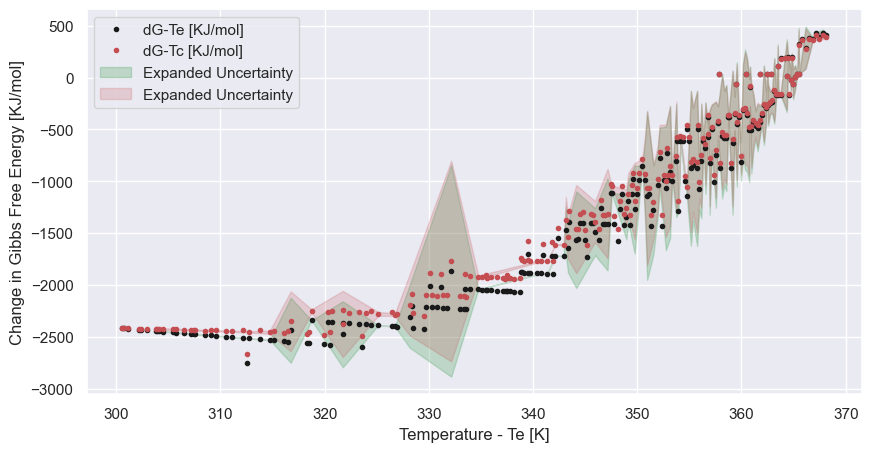

In [18]:
# plotting GFE at Te and Tc
mdf.PlotEUGFE(df_mean, df_std)

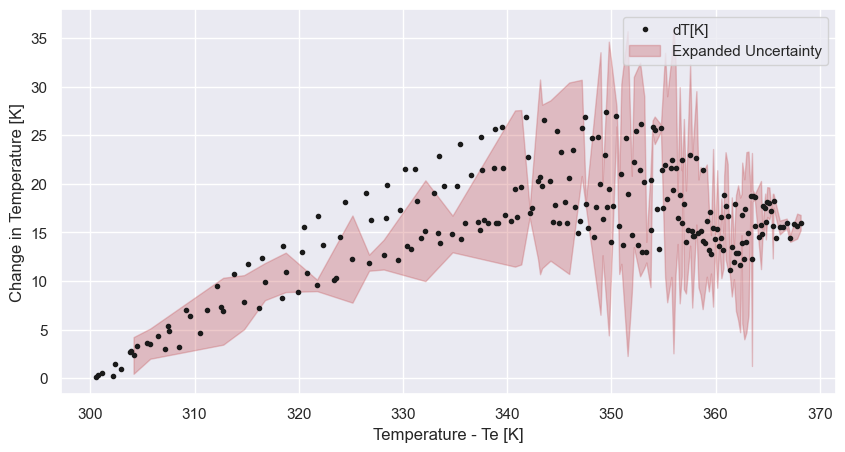

In [19]:
# plotting dT
mdf.PlotEUdT(df_mean, df_std)

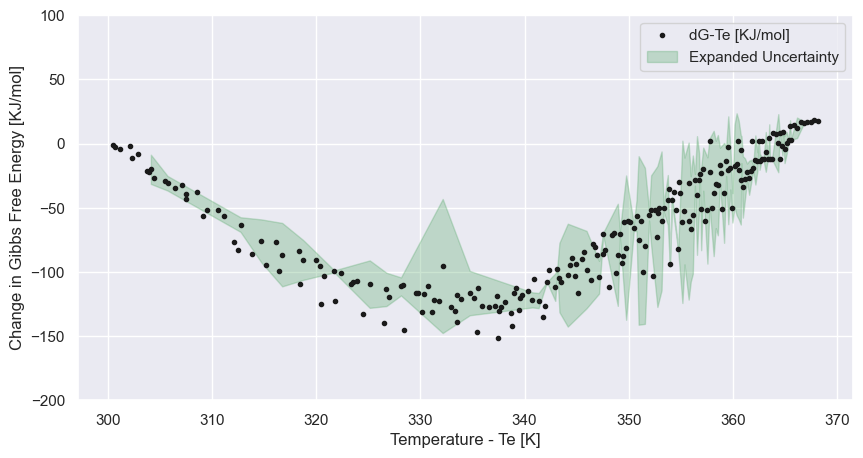

In [20]:
# plotting dG
mdf.PlotEUdG(df_mean, df_std)

# Data Analysis Result

In [21]:
mdf.DataPropAvg(df_mean, df_std)

Tc  average:     324.7877 +- 2.0934 [K]
P   average:     0.6561 +- 0.0304 [bar]
dT  average:     15.7971 +- 2.5043 [K]
TR  average:     0.1975 +- 0.0313 [K/W]
GFE average:     -1323.5673 +- 118.0243 [KJ/mol]



Finding best G(T,P) with lowest dG value

In [22]:
mdf.BestTP(df_mean)

Optimal G(T,P) condition at lowest (optimal) dG[-151.5555]
Te optimal:        337.4833[K] 
P  optimal:        0.48[bar] 
dT optimal:        24.8333[K] 
TR optimal:        0.3104[K/W] 
GFE optimal:       dG(337.4833, 0.48) = -2059.6294 [KJ/mol]

